In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

The aim of the following functions is to create an artificial dataset to test linear perceptron algorithm. Here I have made functions to create datasets for binary classification tasks and for regression tasks.

The idea is to generate sets of k points (one for each class) at random and use the distance from these points to determine the class or the regression target. The precise way to integrate the distance information from k points into a single value is to return the product of the distance from the closest point times the distance from the furthest point.

a) out = oracle(x, landmarks) which takes in input a vector x and a data matrix landmarks that contains a number of landmark vectors as rows. The function must consider only the closest and the furthest landmark to x and return the scalar value of the product of these two distances.

b) (data_mtx, y) or (data_mtx, y, landmarks) = make_dataset_regression(size=100, complexity=2, ndim=3, return_landmarks=False) which outputs the data matrix data_mtx and the target vector y. The number of vectors in data_mtx is determined by the parameter size. The number of landmarks is determined by the parameter complexity. The number of dimensions of the landmark vectors and of the data matrix is determined by ndim. If the flag return_landmarks is set to True then the output of the function includes in addition the landmarks data matrix. The target vector y is computed using the function oracle. The vectors returned are sampled uniformly at random in the unit hyper-cube (i.e. the coordinates are between 0 and 1). The landmarks vectors are sampled uniformly at random in the unit hyper-cube. 

c) data_mtx, y = make_2d_grid_dataset_regression(size, landmarks) which outputs the data matrix data_mtx and the target vector y. The number of vectors in data_mtx is determined by the parameter size. The target vector y is computed using the function oracle using the landmarks passed in input in the data matrix landmarks. This function assumes that the dimension of the required vectors is 2 and generates a 2D grid of equally spaced vectors to fill the unit square (i.e. the coordinates are between 0 and 1). Note: if the size is 100 then the grid will be 10 x 10. 

d) y = oracle_classification(X, pos_landmarks, neg_landmarks) which takes in input a data matrix X and two data matrix pos_landmarks and neg_landmarks. The function will output a target vector containing the values 1 and 0: a vector x is associated to the target 1 when the value of the oracle function for the positive landmarks is less or equal to the value of the oracle function for the negative landmarks, 0 otherwise.

e) (data_mtx, y) or (data_mtx, y, pos_landmarks, neg_landmarks) = make_dataset_classification(size=100, complexity=2, ndim=3, return_landmarks=False) which outputs the data matrix data_mtx and the target vector y. The number of vectors in data_mtx is determined by the parameter size. The number of landmarks is determined by the parameter complexity. The number of dimensions of the landmark vectors and of the data matrix is determined by ndim. If the flag return_landmarks is set to True then the output of the function includes in addition the positive and negative landmarks data matrices. The target vector y is computed using the function oracle_classification. The vectors returned are sampled uniformly at random in the unit hyper-cube (i.e. the coordinates are between 0 and 1). The landmarks vectors are sampled uniformly at random in the unit hyper-cube. 

f) data_mtx, y = make_2d_grid_dataset_classification(size, pos_landmarks, neg_landmarks) which outputs the data matrix data_mtx and the target vector y. The number of vectors in data_mtx is determined by the parameter size. The target vector y is computed using the function oracle_classification using the landmarks passed in input in the data matrices pos_landmarks and neg_landmarks. This function assumes that the dimension of the required vectors is 2 and generates a 2D grid of equally spaced vectors to fill the unit square (i.e. the coordinates are between 0 and 1). Note: if the size is 100 then the grid will be 10 x 10. 

In [2]:
def oracle(x, landmarks):
    dist=np.zeros(np.shape(landmarks)[0])
    for i in range(np.shape(landmarks)[0]):
        dist[i]=np.linalg.norm(x-landmarks[i])
    return dist[np.argsort(dist)[0]]*dist[np.argsort(dist)[-1]]

def make_dataset_regression(size=100, complexity=2, ndim=3, return_landmarks=False):
    landmarks=np.zeros([complexity,ndim],dtype=float)
    for i in range(complexity):
        for j in range(ndim):
            landmarks[i][j]=np.random.uniform(low=0, high=1)
    data_mtx=np.zeros([size,ndim],dtype=float)
    y=np.zeros(size,dtype=float)
    for i in range(size):
        for j in range(ndim):
            data_mtx[i][j]=np.random.uniform(low=0, high=1)
        y[i]=oracle(data_mtx[i],landmarks)
    if return_landmarks==True:
        return data_mtx, y, landmarks
    else:
        return data_mtx, y
    
def make_2d_grid_dataset_regression(size, landmarks):
    n=int(np.sqrt(size))
    points=np.linspace(0,1,num=n)
    data_mtx=np.array(np.meshgrid(points,points)).T.reshape(-1,2)
    y=np.zeros(n*n,dtype=float)
    for i in range(len(y)):
        y[i]=oracle(data_mtx[i],landmarks)
    return data_mtx,y
    
def oracle_classification(X, pos_landmarks, neg_landmarks):
    y=np.zeros(np.shape(X)[0],dtype=float)
    for i in range(np.shape(X)[0]):
        p1=oracle(X[i],pos_landmarks)
        p2=oracle(X[i],neg_landmarks)
        if p1<=p2:
            y[i]=1
        else:
            y[i]=0
    return y

def make_dataset_classification(size=100, complexity=2, ndim=3, return_landmarks=False):
    pos_landmarks=np.zeros([complexity,ndim],dtype=float)
    neg_landmarks=np.zeros([complexity,ndim],dtype=float)
    for i in range(complexity):
        for j in range(ndim):
            pos_landmarks[i][j]=np.random.uniform(low=0, high=1)
            neg_landmarks[i][j]=np.random.uniform(low=0, high=1)
    data_mtx=np.zeros([size,ndim],dtype=float)
    
    for i in range(size):
        for j in range(ndim):
            data_mtx[i][j]=np.random.uniform(low=0, high=1)
            
    y=oracle_classification(data_mtx, pos_landmarks, neg_landmarks)
    
    if return_landmarks==True:
        return data_mtx, y, pos_landmarks, neg_landmarks
    else:
        return data_mtx, y
    
def make_2d_grid_dataset_classification(size, pos_landmarks, neg_landmarks):
    n=int(np.sqrt(size))
    points=np.linspace(0,1,num=n,endpoint=False)
    data_mtx=np.array(np.meshgrid(points,points)).T.reshape(-1,2)
    y=oracle_classification(data_mtx, pos_landmarks, neg_landmarks)
    
    return data_mtx,y

plot_2d_classification(X_test, y_test, preds, pos_landmarks, neg_landmarks) to display a data matrix X_test, colouring the instances according to their respective class. The data matrices pos_landmarks and neg_landmarks are also received in input to localize the landmarks. The function should plot three plots: the first where the instances in X_test are coloured using the target vector preds, the second using the target vector y_test and the third where the two coloring schemes are overlapped. To obtain the overlap effect consider using the color map gray for y_test with an alpha of 0.3. The last plot should report in the title the accuracy score of the predictions.

plot_2d_regression(X_test, y_test, preds, landmarks) to display a data matrix X_test, colouring the instances according to their respective class. The data matrix landmarksis also received in input to localize the landmarks. The function should plot two plots: the first where the instances in X_test are coloured using the target vector preds, the second using the target vector y_test. The first plot should report in the title the correlation coefficient score of the predictions vs. the values in y_test

In [3]:
def plot_2d_classification(X_test, y_test, preds, pos_landmarks, neg_landmarks):
    fig,ax=plt.subplots(nrows=1,ncols=3,figsize=(10,5))
    x_coords=[]
    y_coords=[]
    for i in range(np.shape(X_test)[0]):
        x_coords.append(X_test[i][0])
        y_coords.append(X_test[i][1])
        

    ax[0].scatter(x_coords,y_coords,c=preds,cmap='bwr',alpha=0.2)
    ax[0].set_title('Prediction')

    for i in range(len(neg_landmarks)):
        ax[0].plot(pos_landmarks[i][0],pos_landmarks[i][1],marker='d',markersize=10,color='blue')
        ax[0].plot(neg_landmarks[i][0],neg_landmarks[i][1],marker='d',markersize=10,color='red')


    ax[1].scatter(x_coords,y_coords,c=y_test,cmap='bwr',alpha=0.2)
    ax[1].set_title('Truth')

    accuracy=np.sum(preds==y_test)/len(preds)
    for i in range(len(neg_landmarks)):
        ax[1].plot(pos_landmarks[i][0],pos_landmarks[i][1],marker='d',markersize=10,color='blue')
        ax[1].plot(neg_landmarks[i][0],neg_landmarks[i][1],marker='d',markersize=10,color='red')

    ax[2].scatter(x_coords,y_coords,c=preds,cmap='bwr',alpha=0.3)
    ax[2].scatter(x_coords,y_coords,c=y_test,cmap='bwr',alpha=0.1)
    ax[2].set_title(f'Comparison Acc:{round(accuracy,3)}')

    for i in range(len(neg_landmarks)):
        ax[2].plot(pos_landmarks[i][0],pos_landmarks[i][1],marker='d',markersize=10,color='blue')
        ax[2].plot(neg_landmarks[i][0],neg_landmarks[i][1],marker='d',markersize=10,color='red')
    
def plot_2d_regression(X_test, y_test, preds, landmarks):
    fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
    x_coords=[]
    y_coords=[]

    for i in range(np.shape(X_test)[0]):
        x_coords.append(X_test[i][0])
        y_coords.append(X_test[i][1])

    correlation_mat=sp.stats.pearsonr(y_test,preds)
    ax[0].scatter(x_coords,y_coords,c=preds,cmap='hot_r')
    ax[0].set_title(f'Prediction cc {round(correlation_mat[0],3)}')
    for i in range(len(landmarks)):
        ax[0].plot(landmarks[i][0],landmarks[i][1],marker='d',markersize=10,color='blue')
        

    ax[1].scatter(x_coords,y_coords,c=y_test,cmap='hot_r')
    ax[1].set_title('Truth')
    for i in range(len(landmarks)):
        ax[1].plot(landmarks[i][0],landmarks[i][1],marker='d',markersize=10,color='blue')
        

The aim of the following functions is to train artificial neural network type of classifiers and regressors. The classification is always intended as binary classification. Here I have written my own implementation for the cases of the linear perceptron. The perceptron is always assumed to have a single output unit.

perceptron_model = (w, b) = init_linear_perceptron(in_dim, init_size=1e-3) that takes in input a desired integer input dimension in_dim and a desired float size init_size. This function initializes the perceptron model with random values. The return model is a 2-tuple consisting of a vector w and a scalar b. Both are initialised with values in the range (-init_size, +init_size). The vector w has dimensionality equal to in_dim.

y = forward_linear_perceptron(x, perceptron_model) that takes in input a vector x and a model perceptron_model and returns the output prediction according to the linear perceptron rule. 

perceptron_model = update_linear_perceptron(x, t, learning_rate, perceptron_model) that takes in input a vector x, a target value t, a learning rate float value of learning_rate and a model perceptron_model and returns an updated model according to the linear perceptron rule. 

perceptron_model = fit_linear_perceptron(X_train, y_train, learning_rate, max_n_iter=1000) that takes in input a data matrix X_train a target vector y_train a learning rate float value of learning_rate a maximum number of iterations of max_n_iter and returns a fit perceptron model according to the linear perceptron rule. 

scores = score_linear_perceptron(X_test, perceptron_model) that takes in input a data matrix X_test, a fit perceptron model perceptron_model and returns a score vector scores containing real values such that larger positive values indicate a preference for the positive class and viceversa for negative values. 

preds = predict_linear_perceptron(X_test, perceptron_model) that takes in input a data matrix X_test, a fit perceptron model perceptron_model and returns a prediction vector scores containing values 1 when predicting the positive class and -1 when predicting the negative class. 

In [4]:
def init_linear_perceptron(in_dim, init_size=1e-3):
    b=np.random.uniform(-init_size,init_size)
    w=np.random.uniform(-init_size,init_size,in_dim)
    model=(w,b)
    return model
    
def forward_linear_perceptron(x, perceptron_model):
    weights=perceptron_model[0]
    bias=perceptron_model[1]
    val=np.dot(weights,x)+bias
    return val
    
def update_linear_perceptron(x, t, learning_rate, perceptron_model):
    w=perceptron_model[0]
    bias=perceptron_model[1]

    y=forward_linear_perceptron(x, perceptron_model)
   
    w = w + learning_rate * (t - y) * x
    bias=bias+ learning_rate * (t - y)
    model=(w,bias)
    return model
    
def fit_linear_perceptron(X_train, y_train, learning_rate, max_n_iter=1000):
    in_dim=np.shape(X_train)[1]
    model=init_linear_perceptron(in_dim, init_size=1e-3)
    for j in range(max_n_iter):
        for i in range(len(X_train)):
            model=update_linear_perceptron(X_train[i], y_train[i], learning_rate, model)
    
    return model
    
def score_linear_perceptron(X_test, perceptron_model):
    scores=np.zeros(np.shape(X_test)[0],dtype=float)
    for i in range(np.shape(X_test)[0]):
        scores[i]=forward_linear_perceptron(X_test[i], perceptron_model)
    return scores
    
def predict_linear_perceptron(X_test, perceptron_model):
    preds=np.zeros(np.shape(X_test)[0])
    scores=score_linear_perceptron(X_test, perceptron_model)
    
    for i in range(len(scores)):
        if scores[i]>0:
            preds[i]=1
        else:
            preds[i]=-1
    return preds

Checkpoint to assess whether the functions were implemented correctly

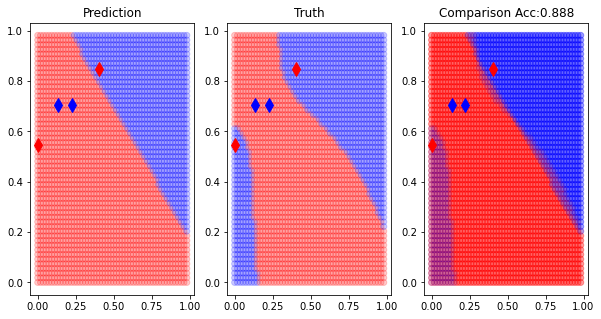

In [5]:
data, y, pos_landmarks, neg_landmarks = make_dataset_classification(size=300, complexity=2, ndim=2, return_landmarks=True)
y[y==0]=-1
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=.3)
X_test, y_test = make_2d_grid_dataset_classification(3000, pos_landmarks, neg_landmarks)
y_test[y_test==0]=-1

perceptron_model = fit_linear_perceptron(X_train, y_train, learning_rate=1e-2)
preds = predict_linear_perceptron(X_test, perceptron_model)
plot_2d_classification(X_test, y_test, preds, pos_landmarks, neg_landmarks)